In [1]:
import tensorflow as tf

import random
from collections import defaultdict
from typing import Callable, Dict, List, Optional, Sequence, Tuple, Union
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
max_length = 5
mnist_digit_dim=28
min_overlap = 0.0
max_overlap = 0.5


In [4]:
def add_left_and_right_paddings(number) :
    """Add paddings to left and right of the number."""
    digits = [int(digit) for digit in list(str(number))]
    remanining_length = max_length - len(digits)
    left_padding = random.randint(0, remanining_length)
    right_padding = remanining_length - left_padding
    digits = [-1] * left_padding + digits + [-1] * right_padding
    return digits

In [5]:
add_left_and_right_paddings(1)

[-1, -1, -1, -1, 1]

In [6]:
def _get_samples_by_digit() -> Dict[int, List]:
    """Stores a collection of images for each digit."""
    samples_by_digit = defaultdict(list)
    for image, digit in (zip(x_train, y_train)):
        samples_by_digit[digit].append(image.squeeze())
    blank_image = tf.zeros((mnist_digit_dim, mnist_digit_dim))
    samples_by_digit[-1].append(blank_image)
    return samples_by_digit

In [7]:
samples_by_digit = _get_samples_by_digit()

2022-06-08 23:56:34.003810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 23:56:34.030437: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 23:56:34.030613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 23:56:34.031223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [8]:

def construct_image_from_number(number: int) -> tf.Tensor:
    """Concatenate images of single digits."""
    overlap = random.uniform(min_overlap, max_overlap)
    overlap_width = int(overlap * mnist_digit_dim)
    width_increment = mnist_digit_dim - overlap_width
    x, y = 0, 2  # Current pointers at x and y coordinates
    digits = add_left_and_right_paddings(number)
    multi_digit_image = tf.zeros((32, mnist_digit_dim * max_length)).numpy()
    for digit in digits:
        digit_image = random.choice(samples_by_digit[digit])
        digit_image = tf.identity(
            digit_image
        ).numpy()  # To avoid overwriting the original image
        digit_image[:, :overlap_width] = tf.maximum(
            multi_digit_image[y : y + mnist_digit_dim, x : x + overlap_width],
            digit_image[:, :overlap_width],
        )
        multi_digit_image[
            y : y + mnist_digit_dim, x : x + mnist_digit_dim
        ] = digit_image
        x += width_increment
    return multi_digit_image

In [12]:
construct_image_from_number(5000).shape


(32, 140)

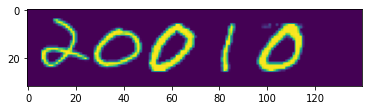

In [15]:
plt.imshow(construct_image_from_number(20010))